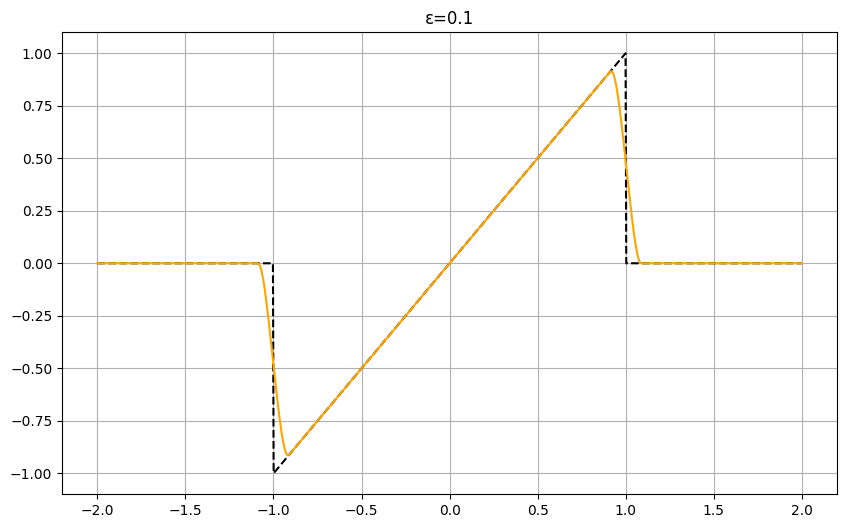

In [8]:
# BUMP MOLLIFIER

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define the compactly supported bump mollifier
def bump_mollifier(y, epsilon):
    if np.abs(y) < 1:
        return np.exp(-1 / (1 - (y / epsilon)**2))
    else:
        return 0

# Calculate the normalization constant for the bump mollifier
def calculate_bump_normalization_constant(epsilon):
    integrand = lambda x: bump_mollifier(x, epsilon)
    result, _ = quad(integrand, -epsilon, epsilon)
    return 1 / result

# Optimized normalized bump mollifier
def optimized_bump_mollifier(y, epsilon, normalization_constant):
    if np.abs(y) < epsilon:
        return bump_mollifier(y, epsilon) * normalization_constant
    else:
        return 0
    
def u(x):
    if x <= 1 and x >= -1:
        return x
    else:
        return 0
    
def u_array(x):
    y = np.zeros_like(x)
    for i in range(len(x)):
        if x[i] <= 1 and x[i] >= -1:
            y[i] = x[i]
        else:
            y[i] = 0
    return y

# Define the smoothed |x| function using a given mollifier
def smoothed_abs_with_mollifier(x, epsilon, mollifier, *args):
    integrand = lambda y: u(x - y) * mollifier(y, epsilon, *args)
    result, _ = quad(integrand, -epsilon, epsilon)  # Approximate over a finite range
    return result

# Range of x values
x_values = np.linspace(-2, 2, 1000)
y = u_array(x_values)

# Specify epsilon
epsilon_value = 0.1

# Calculate the normalization constant for the bump mollifier
bump_constant = calculate_bump_normalization_constant(epsilon_value)

# Compute smoothed |x| for Gaussian, bump, and exponential mollifiers
bump_values = [smoothed_abs_with_mollifier(x, epsilon_value, optimized_bump_mollifier, bump_constant) for x in x_values]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_values, y, label="|x| (original)", color="black", linestyle="--")
plt.plot(x_values, bump_values, label="Smoothed |x| (Bump Mollifier)", color="orange")

# table = np.zeros((len(x_values),2))
# for i in range(len(x_values)):
#     table[i,0] = x_values[i]
#     table[i,1] = bump_values[i]
    
# for i in range(len(x_values)):
#     print(f"{table[i,0]:.3f}, {table[i,1]:.3f}")

# Customize plot
# plt.xlabel("x")
# plt.ylabel("Smoothed |x|")
# plt.legend()
plt.title(f"ε={epsilon_value}")
plt.grid(True)
plt.show()

In [ ]:
# BUMP, GAUSSIAN AND EXPONENTIAL MOLLIFIER

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define the Gaussian mollifier
def gaussian_mollifier(y, epsilon):
    return (1 / np.sqrt(2 * np.pi * epsilon**2)) * np.exp(-y**2 / (2 * epsilon**2))

# Define the compactly supported bump mollifier
def bump_mollifier(y, epsilon):
    if np.abs(y) < 1:
        return np.exp(-1 / (1 - (y / epsilon)**2))
    else:
        return 0

# Calculate the normalization constant for the bump mollifier
def calculate_bump_normalization_constant(epsilon):
    integrand = lambda x: bump_mollifier(x, epsilon)
    result, _ = quad(integrand, -epsilon, epsilon)
    return 1 / result

# Optimized normalized bump mollifier
def optimized_bump_mollifier(y, epsilon, normalization_constant):
    if np.abs(y) < epsilon:
        return bump_mollifier(y, epsilon) * normalization_constant
    else:
        return 0

# Define the Exponential mollifier
def exponential_mollifier(y, epsilon):
    C = 1 / (2 * epsilon)  # Normalization constant
    return C * np.exp(-np.abs(y) / epsilon)

# Define the smoothed |x| function using a given mollifier
def smoothed_abs_with_mollifier(x, epsilon, mollifier, *args):
    integrand = lambda y: np.abs(x - y) * mollifier(y, epsilon, *args)
    result, _ = quad(integrand, -10, 10)  # Approximate over a finite range
    return result

# Range of x values
x_values = np.linspace(-3, 3, 500)

# Specify epsilon
epsilon_value = 0.8

# Calculate the normalization constant for the bump mollifier
bump_constant = calculate_bump_normalization_constant(epsilon_value)

# Compute smoothed |x| for Gaussian, bump, and exponential mollifiers
gaussian_values = [smoothed_abs_with_mollifier(x, epsilon_value, gaussian_mollifier) for x in x_values]
bump_values = [smoothed_abs_with_mollifier(x, epsilon_value, optimized_bump_mollifier, bump_constant) for x in x_values]
exponential_values = [smoothed_abs_with_mollifier(x, epsilon_value, exponential_mollifier) for x in x_values]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_values, np.abs(x_values), label="|x| (original)", color="black", linestyle="--")
plt.plot(x_values, gaussian_values, label="Smoothed |x| (Gaussian Mollifier)", color="blue")
plt.plot(x_values, bump_values, label="Smoothed |x| (Bump Mollifier)", color="orange")
plt.plot(x_values, exponential_values, label="Smoothed |x| (Exponential Mollifier)", color="green")

# Customize plot
plt.xlabel("x")
plt.ylabel("Smoothed |x|")
plt.title(f"Comparison of |x| Approximation with Gaussian, Bump, and Exponential Mollifiers (ε={epsilon_value})")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# BUMP MOLLIIFER FOR 3 ε VALUES

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define the compactly supported bump mollifier
def bump_mollifier(y, epsilon):
    if np.abs(y) < 1:
        return np.exp(-1 / (1 - (y / epsilon)**2))
    else:
        return 0

# Calculate the normalization constant for the bump mollifier
def calculate_bump_normalization_constant(epsilon):
    integrand = lambda x: bump_mollifier(x, epsilon)
    result, _ = quad(integrand, -epsilon, epsilon)
    return 1 / result

# Optimized normalized bump mollifier
def optimized_bump_mollifier(y, epsilon, normalization_constant):
    if np.abs(y) < epsilon:
        return bump_mollifier(y, epsilon) * normalization_constant
    else:
        return 0

# Define the smoothed |x| function using a given mollifier
def smoothed_abs_with_mollifier(x, epsilon, mollifier, *args):
    integrand = lambda y: np.abs(x - y) * mollifier(y, epsilon, *args)
    result, _ = quad(integrand, -10, 10)  # Approximate over a finite range
    return result

# Range of x values
x_values = np.linspace(-1, 1, 100)


# Calculate the normalization constant for the bump mollifier
bump_constant_1 = calculate_bump_normalization_constant(1)
bump_constant_2 = calculate_bump_normalization_constant(0.5)
bump_constant_3 = calculate_bump_normalization_constant(0.25)

# Compute smoothed |x| for Gaussian, bump, and exponential mollifiers
bump_values_1 = [smoothed_abs_with_mollifier(x, 1, optimized_bump_mollifier, bump_constant_1) for x in x_values]
bump_values_2 = [smoothed_abs_with_mollifier(x, 0.5, optimized_bump_mollifier, bump_constant_2) for x in x_values]
bump_values_3 = [smoothed_abs_with_mollifier(x, 0.25, optimized_bump_mollifier, bump_constant_3) for x in x_values]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_values, np.abs(x_values), label="|x| (original)", color="black", linestyle="--")
plt.plot(x_values, bump_values_1, label="Smoothed |x| (Bump Mollifier)")
plt.plot(x_values, bump_values_2, label="Smoothed |x| (Bump Mollifier)")
plt.plot(x_values, bump_values_3, label="Smoothed |x| (Bump Mollifier)")

# Customize plot
plt.grid(True)
plt.show()

C:\Users\iBruu\AppData\Local\Temp\ipykernel_6988\1243033639.py:15: RuntimeWarning: overflow encountered in exp
  bump = np.where(r2 < 1, np.exp(-1 / (1 - r2)), 0)


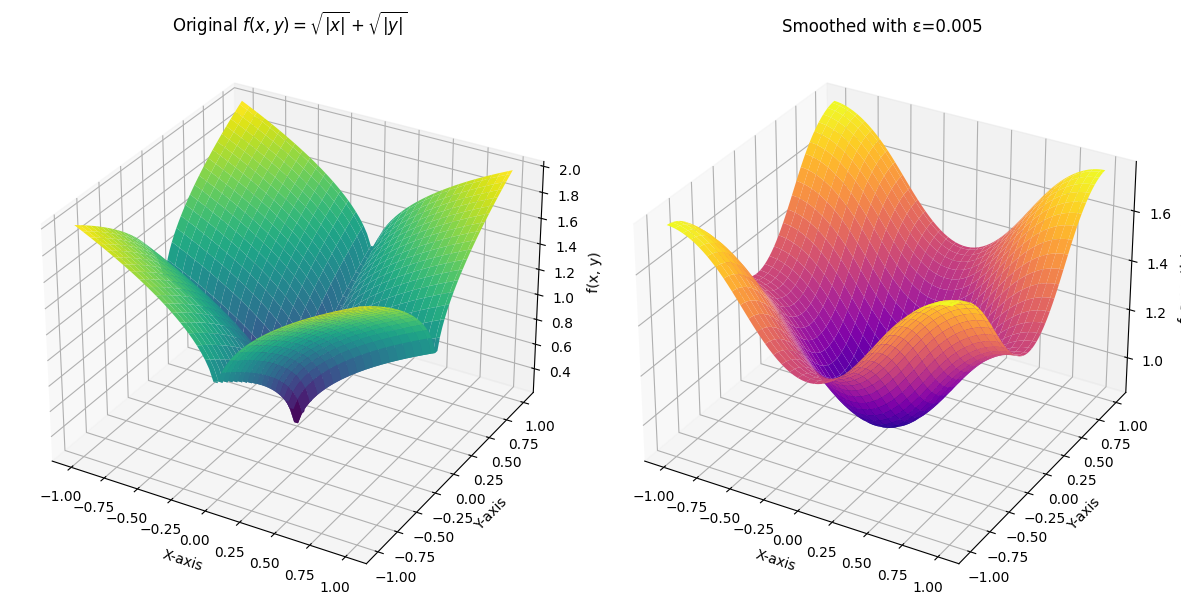

In [1]:
# BUMP MOLLIFIER IN R²

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Define the function f(x, y)
def f(x, y):
    return np.sqrt(np.abs(x)) + np.sqrt(np.abs(y))

# Define the mollifier (bump function)
def bump_function(x, y, epsilon):
    r2 = (x / epsilon) ** 2 + (y / epsilon) ** 2
    with np.errstate(divide='ignore', invalid='ignore'):  # Suppress warnings for controlled cases
        bump = np.where(r2 < 1, np.exp(-1 / (1 - r2)), 0)
    bump[np.isinf(bump)] = 0  # Explicitly handle the boundary condition
    return bump

# Generate a grid for the mollifier
def create_mollifier(epsilon, grid_size=51):
    t = np.linspace(-epsilon, epsilon, grid_size)
    X, Y = np.meshgrid(t, t)
    mollifier = bump_function(X, Y, epsilon)
    mollifier /= np.sum(mollifier)  # Normalize the mollifier
    return mollifier

# Apply the mollifier via convolution
def mollify(f_values, mollifier):
    # Convolve the function values with the mollifier
    Z_smooth = convolve2d(f_values, mollifier, mode='same', boundary='wrap')
    return Z_smooth

# Generate the grid for the function
x = np.linspace(-1, 1, 70)
y = np.linspace(-1, 1, 70)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Create a mollifier with a small epsilon
epsilon = 0.005  # Adjust epsilon for smoothness
mollifier = create_mollifier(epsilon)

# Smooth the function using the mollifier
Z_smooth = mollify(Z, mollifier)

# Plot the original and smoothed functions
fig = plt.figure(figsize=(12, 6))

# Original function
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax1.set_title(r'Original $f(x, y) = \sqrt{|x|} + \sqrt{|y|}$')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.set_zlabel('f(x, y)')

# Smoothed function
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z_smooth, cmap='plasma', edgecolor='none')
ax2.set_title(f'Smoothed with ε={epsilon}')
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')
ax2.set_zlabel('f_smooth(x, y)')

plt.tight_layout()
plt.show()

In [ ]:
# BUMP MOLLIFIER IN R² WITH PLOTLY

import numpy as np
import plotly.graph_objects as go
from scipy.signal import convolve2d

# Define the function f(x, y)
def f(x, y):
    return np.sqrt(np.abs(x)) + np.sqrt(np.abs(y))

# Define the mollifier (bump function)
def bump_function(x, y, epsilon):
    r2 = (x / epsilon) ** 2 + (y / epsilon) ** 2
    with np.errstate(divide='ignore', invalid='ignore'):  # Suppress warnings for controlled cases
        bump = np.where(r2 < 1, np.exp(-1 / (1 - r2)), 0)
    bump[np.isinf(bump)] = 0  # Explicitly handle the boundary condition
    return bump

# Generate a grid for the mollifier
def create_mollifier(epsilon, grid_size=51):
    t = np.linspace(-epsilon, epsilon, grid_size)
    X, Y = np.meshgrid(t, t)
    mollifier = bump_function(X, Y, epsilon)
    mollifier /= np.sum(mollifier)  # Normalize the mollifier
    return mollifier

# Apply the mollifier via convolution
def mollify(f_values, mollifier):
    # Convolve the function values with the mollifier
    Z_smooth = convolve2d(f_values, mollifier, mode='same', boundary='wrap')
    return Z_smooth

# Generate the grid for the function
x = np.linspace(-1, 1, 200)
y = np.linspace(-1, 1, 200)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Create a mollifier with a small epsilon
epsilon = 0.05  # Adjust epsilon for smoothness
mollifier = create_mollifier(epsilon)

# Smooth the function using the mollifier
Z_smooth = mollify(Z, mollifier)

# Plot the original function
fig = go.Figure()

# Original function
fig.add_trace(
    go.Surface(
        z=Z,
        x=X,
        y=Y,
        colorscale='Viridis',
        name=r'Original $f(x, y)$'
    )
)

# Smoothed function
fig.add_trace(
    go.Surface(
        z=Z_smooth,
        x=X,
        y=Y,
        colorscale='Plasma',
        name=f'Smoothed with ε={epsilon}',
        showscale=False
    )
)

# Update layout for interactivity
fig.update_layout(
    title="Original and Smoothed Function",
    scene=dict(
        xaxis_title="X-axis",
        yaxis_title="Y-axis",
        zaxis_title="f(x, y)",
    ),
    margin=dict(l=0, r=0, t=30, b=0),
    updatemenus=[
        dict(
            buttons=[
                dict(label="Original",
                     method="update",
                     args=[{"visible": [True, False]}]),
                dict(label="Smoothed",
                     method="update",
                     args=[{"visible": [False, True]}]),
                dict(label="Both",
                     method="update",
                     args=[{"visible": [True, True]}]),
            ],
            direction="down",
        )
    ]
)

fig.show()

In [17]:
import numpy as np

# Function to generate PGFPlots-friendly output
def format_for_pgfplots(X, Y, Z, output_file=None):
    """
    Converts X, Y, Z meshgrid data into PGFPlots-friendly format.
    
    Parameters:
        X, Y, Z: 2D numpy arrays from np.meshgrid
        output_file: Optional, file path to save the output
    """
    rows, cols = X.shape
    lines = []
    
    for i in range(rows):
        for j in range(cols):
            lines.append(f"{X[i, j]:.3f} {Y[i, j]:.3f} {Z[i, j]:.3f}")
        lines.append("")  # Add a blank line between groups
    
    formatted_data = "\n".join(lines)
    
    if output_file:
        with open(output_file, 'w') as file:
            file.write(formatted_data)
        print(f"Data saved to {output_file}")
    else:
        print(formatted_data)
        
format_for_pgfplots(X,Y,Z_smooth)

-1.000 -1.000 1.776
-0.971 -1.000 1.775
-0.942 -1.000 1.772
-0.913 -1.000 1.768
-0.884 -1.000 1.762
-0.855 -1.000 1.755
-0.826 -1.000 1.747
-0.797 -1.000 1.737
-0.768 -1.000 1.726
-0.739 -1.000 1.714
-0.710 -1.000 1.700
-0.681 -1.000 1.685
-0.652 -1.000 1.669
-0.623 -1.000 1.651
-0.594 -1.000 1.633
-0.565 -1.000 1.613
-0.536 -1.000 1.592
-0.507 -1.000 1.571
-0.478 -1.000 1.549
-0.449 -1.000 1.527
-0.420 -1.000 1.505
-0.391 -1.000 1.484
-0.362 -1.000 1.463
-0.333 -1.000 1.444
-0.304 -1.000 1.425
-0.275 -1.000 1.408
-0.246 -1.000 1.392
-0.217 -1.000 1.377
-0.188 -1.000 1.364
-0.159 -1.000 1.353
-0.130 -1.000 1.344
-0.101 -1.000 1.336
-0.072 -1.000 1.330
-0.043 -1.000 1.326
-0.014 -1.000 1.324
0.014 -1.000 1.324
0.043 -1.000 1.326
0.072 -1.000 1.330
0.101 -1.000 1.336
0.130 -1.000 1.344
0.159 -1.000 1.353
0.188 -1.000 1.364
0.217 -1.000 1.377
0.246 -1.000 1.392
0.275 -1.000 1.408
0.304 -1.000 1.425
0.333 -1.000 1.444
0.362 -1.000 1.463
0.391 -1.000 1.484
0.420 -1.000 1.505
0.449 -1.000 1.